In [6]:
install.packages("GoFKernel")

library("ggplot2")
library("GoFKernel")
# "settings": { "notebook.output.textLineLimit": 500 }
options(repr.plot.width=18, repr.plot.height=8)

Installing package into ‘/home/pietro/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)



## ES 1

In [7]:
p1 <- c(0.15, 0.21, 0.35, 0.15, 0.14)
p2 <- c(0.14, 0.05, 0.64, 0.08, 0.09)
x <- c(15.58, 15.9, 16, 16.1, 16.2)

df <- data.frame(p1,p2,x )

Exp_p1 <- sum(p1*x)
Exp_p2 <- sum(p2*x)

var_p1 <- sum(p1 * x^2) - Exp_p1^2
var_p2 <- sum(p2 * x^2) - Exp_p2^2

cat("The first method has expected value: E[X] =",Exp_p1,"and variance: var(X)",var_p1,"\n")
cat("The second method has expected value: E[X] =",Exp_p2,"and variance: var(X)",var_p2)

The first method has expected value: E[X] = 15.959 and variance: var(X) 0.033979 
The second method has expected value: E[X] = 15.9622 and variance: var(X) 0.02816716

## es 2

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



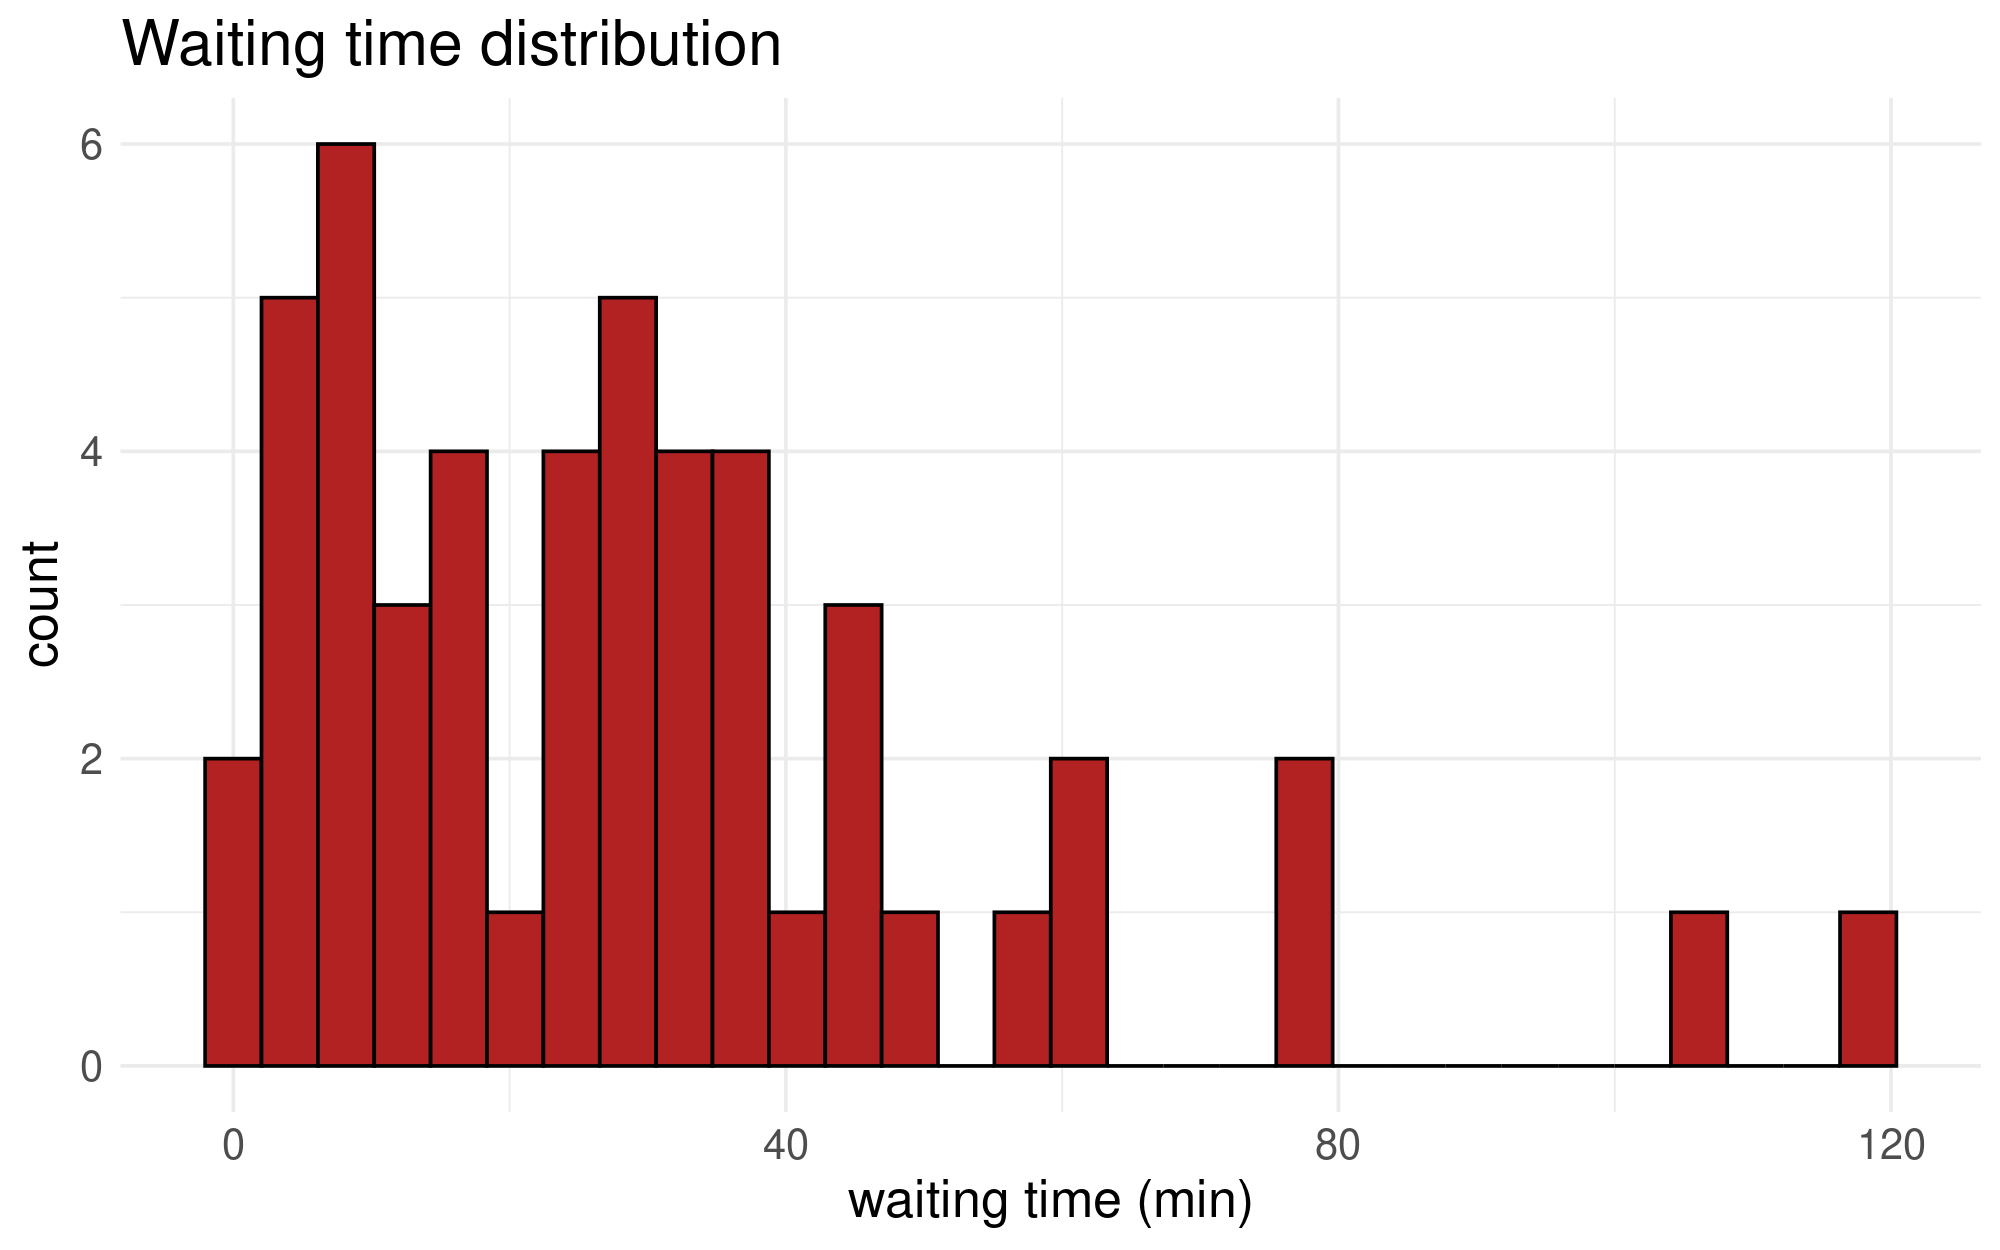

In [31]:
rate <- 1/30
N <- 50
people <- rexp(N, rate)

options(repr.plot.width=8, repr.plot.height=5)

ggplot() + 
    geom_histogram( aes(people),  fill="firebrick",col="black") +
    theme_minimal() +
    labs(title="Waiting time distribution", x="waiting time (min)") + 
    theme(text=element_text(size=15))

# t <- seq(0,120,1)
# p <- dexp(t, rate)
# barplot(p, names = t)

In [28]:
# P(X<10 min) 
cat("The probability of waiting less than 10 minutes is", pexp(10,rate)*100,"%\n")

mean_sim <- mean(people)
E_R <- 1/rate

cat("The mean value fo simulation =",mean(people),"\n")
cat("The expectation value from definition =",E_R,"\n")

#expected value from the pdf --> integral of the pdf between 0,1 times x

x <- 1:1000
func <- function(x) {x*dexp(x,rate)}
e_pdf <- integrate( function(x) {x*dexp(x,rate)}, lower=0, upper=Inf)$value
cat("The expected value from pdf =",e_pdf,"\n")

p_more <- (1 - pexp(60, rate))*100
cat("The probability of wating more than 1 hour is = ",p_more,"%")

The probability of waiting less than 10 minutes is 28.34687 %
The mean value fo simulation = 32.62584 
The expectation value from definition = 30 
The expected value from pdf = 30 
The probability of wating more than 1 hour is =  13.53353 %

## es3

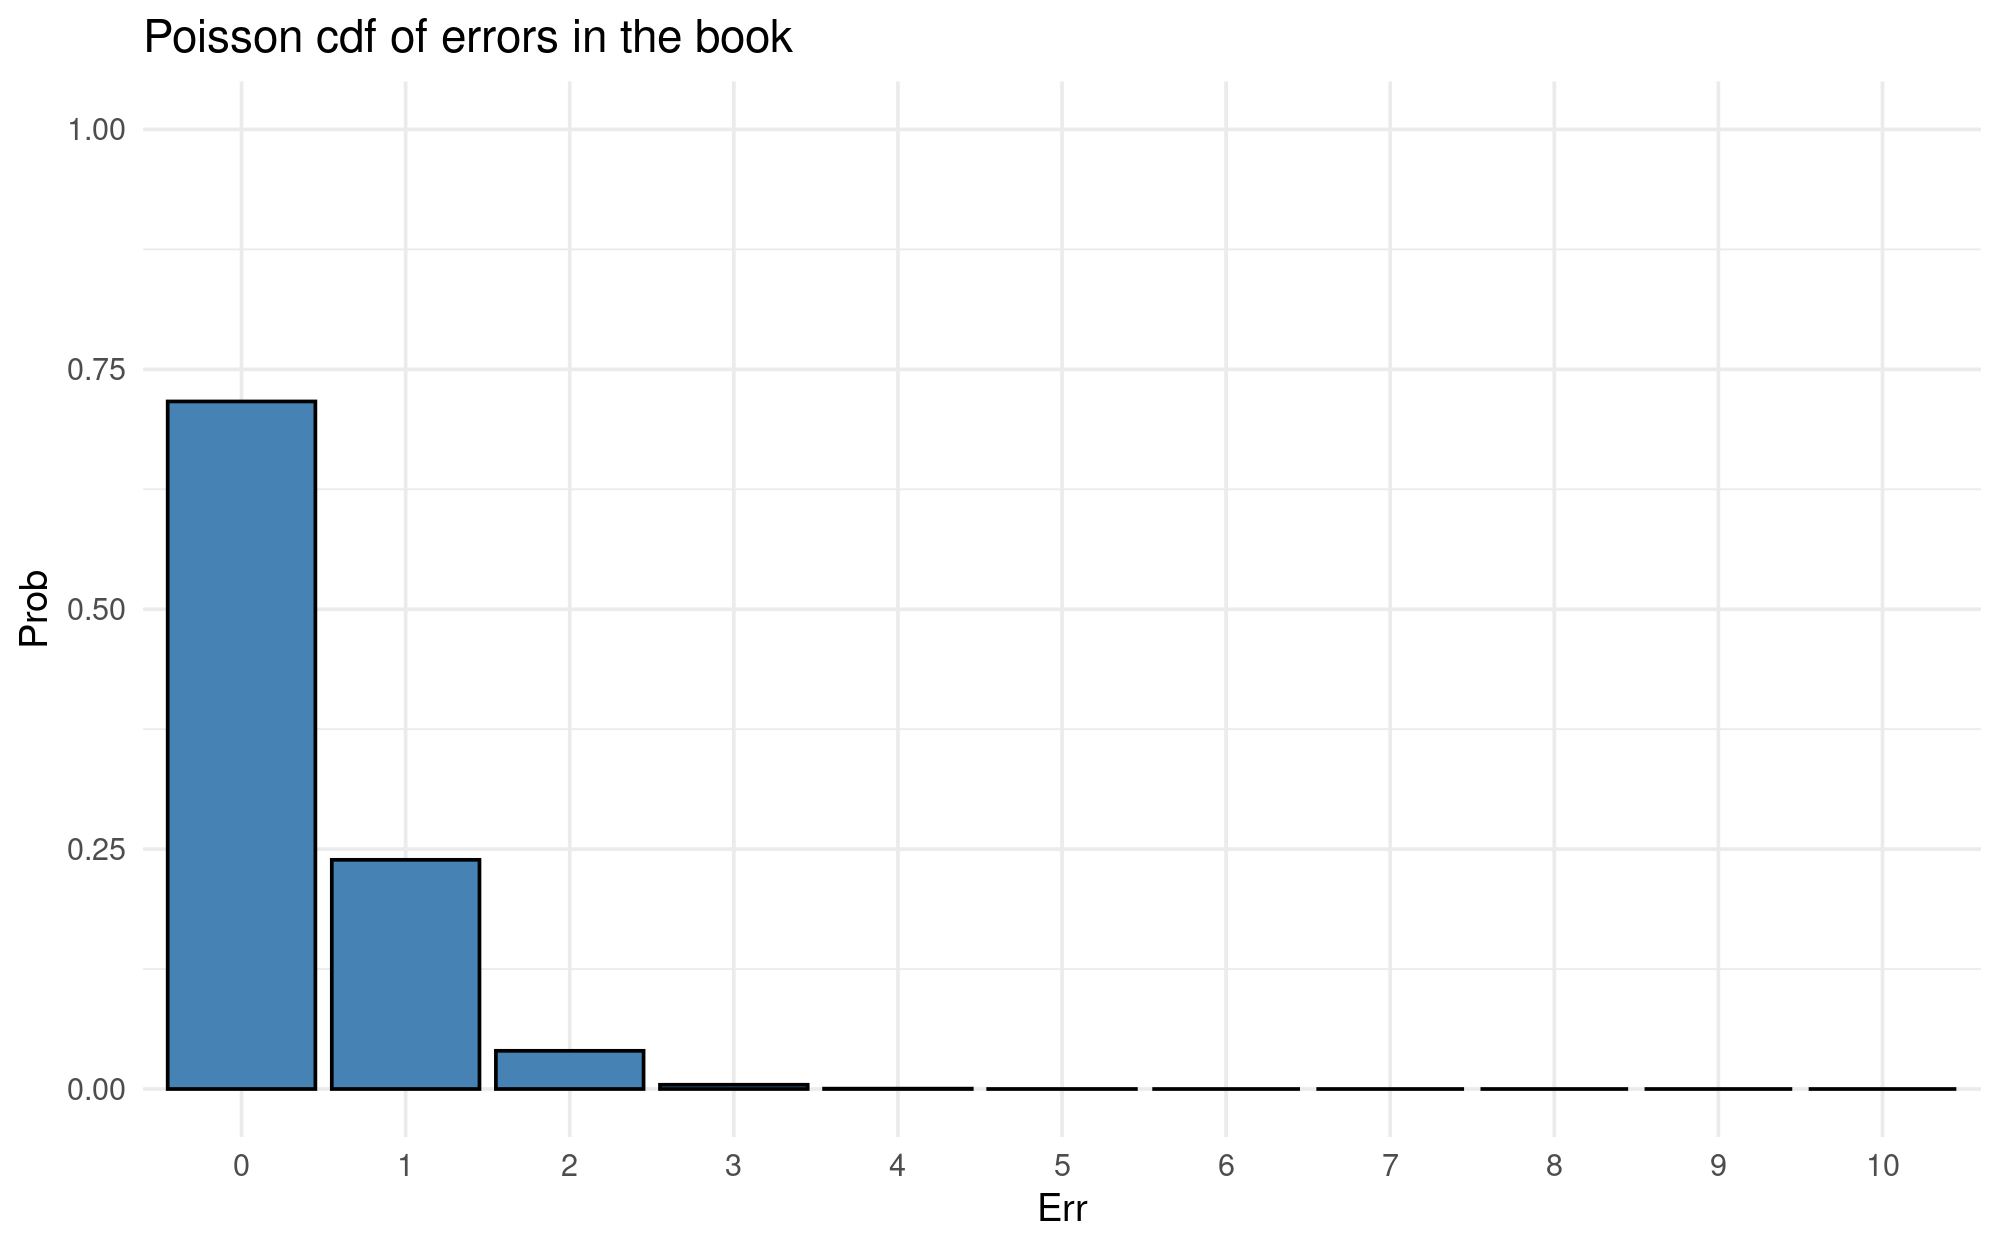

In [180]:
options(repr.plot.width = 8, repr.plot.height = 5, repr.plot.res = 250)

rate <- 1/3
err <- (0:10)
p <- dpois(err, lambda=rate)
# plot(err, p)

df_p <- data.frame(err,p)
ggplot(df_p, aes(x=factor(err), y=p )) +
    geom_bar(stat='identity', fill ="steelblue", color="black")+
    theme_minimal() +
    labs(x="Err", y="Prob", title="Poisson cdf of errors in the book") +
    ylim(0,1)
    # theme(text = element_text(size=16)) + coord_fixed(ratio = 1.5)


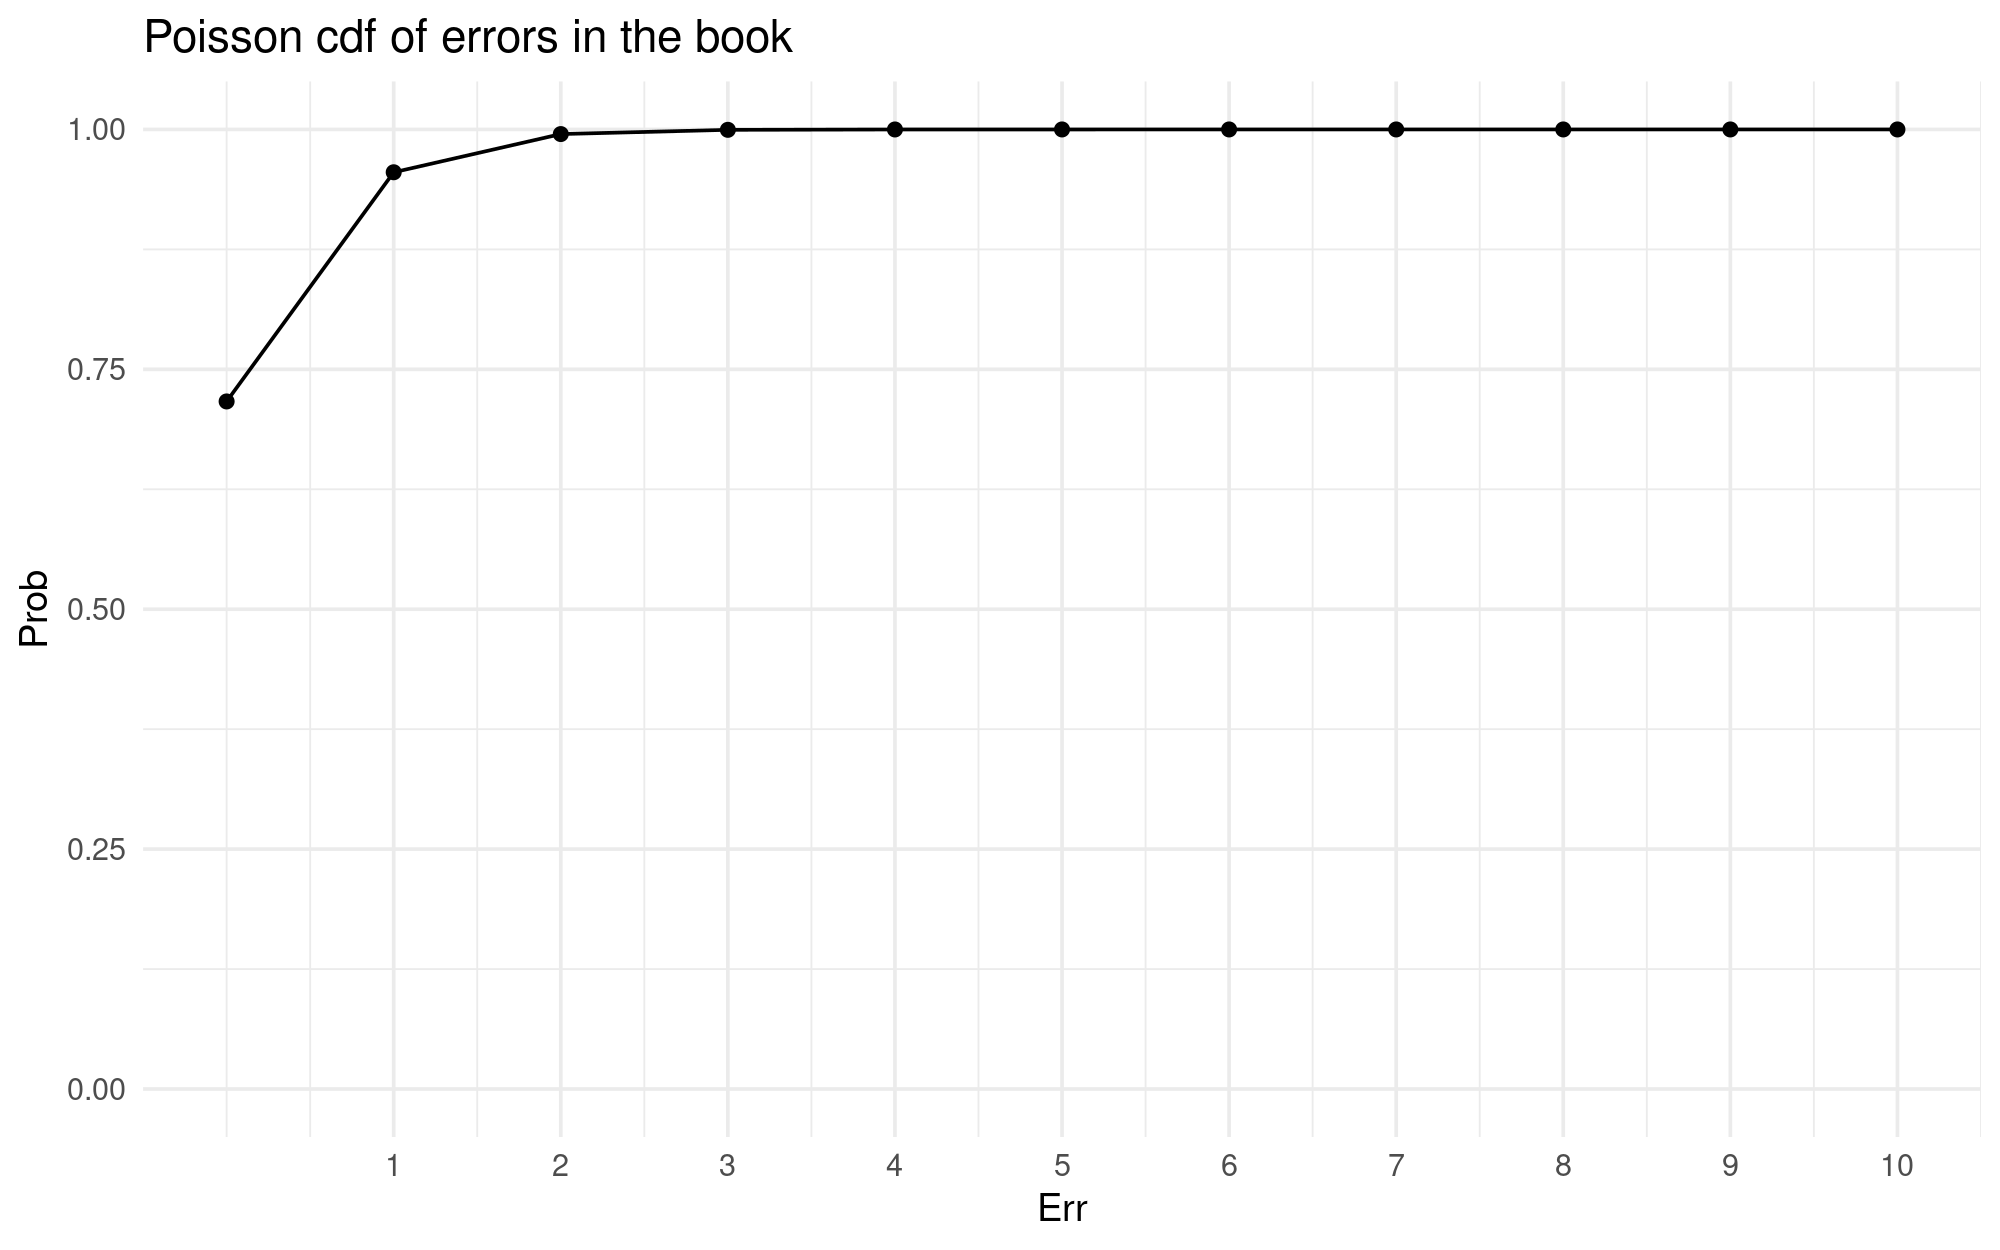

In [41]:
cum <- ppois(err, rate)

df_c <- data.frame(err, cum )
c_plot <- ggplot(df_c, aes(x=factor(err), y=cum )) +
    # geom_bar(stat='identity', fill ="firebrick", color="black")+
    geom_point(aes(x=err,y=cum))+
    geom_line(aes(x=err,y=cum))+
    ylim(0,1)+
    theme_minimal() +
    labs(x="Err", y="Prob", title="Poisson cdf of errors in the book") +
    scale_x_continuous(breaks=x, labels=x) 
c_plot

In [12]:
cat("the probability that there is at least one error on a specific page of the book is:",
    (1-p[1])*100,"%")

the probability that there is at least one error on a specific page of the book is: 28.34687 %

## es4

This event follow the binomial pdf. In fact this distribution gives the probability of obtaining x success in n independent trials. \
The required probability is to have one success in at least 10 trials, so we have to calculate the probability of having 9 failure in 10 trials

In [52]:
p_i <- 1/13 #(or 4/52)
cat("The probability that at least 10 draws are needed to until one ace is drawn is", dbinom(0,9,prob=p_i), "%")


The probability that at least 10 draws are needed to until one ace is drawn is 0.4865652 %

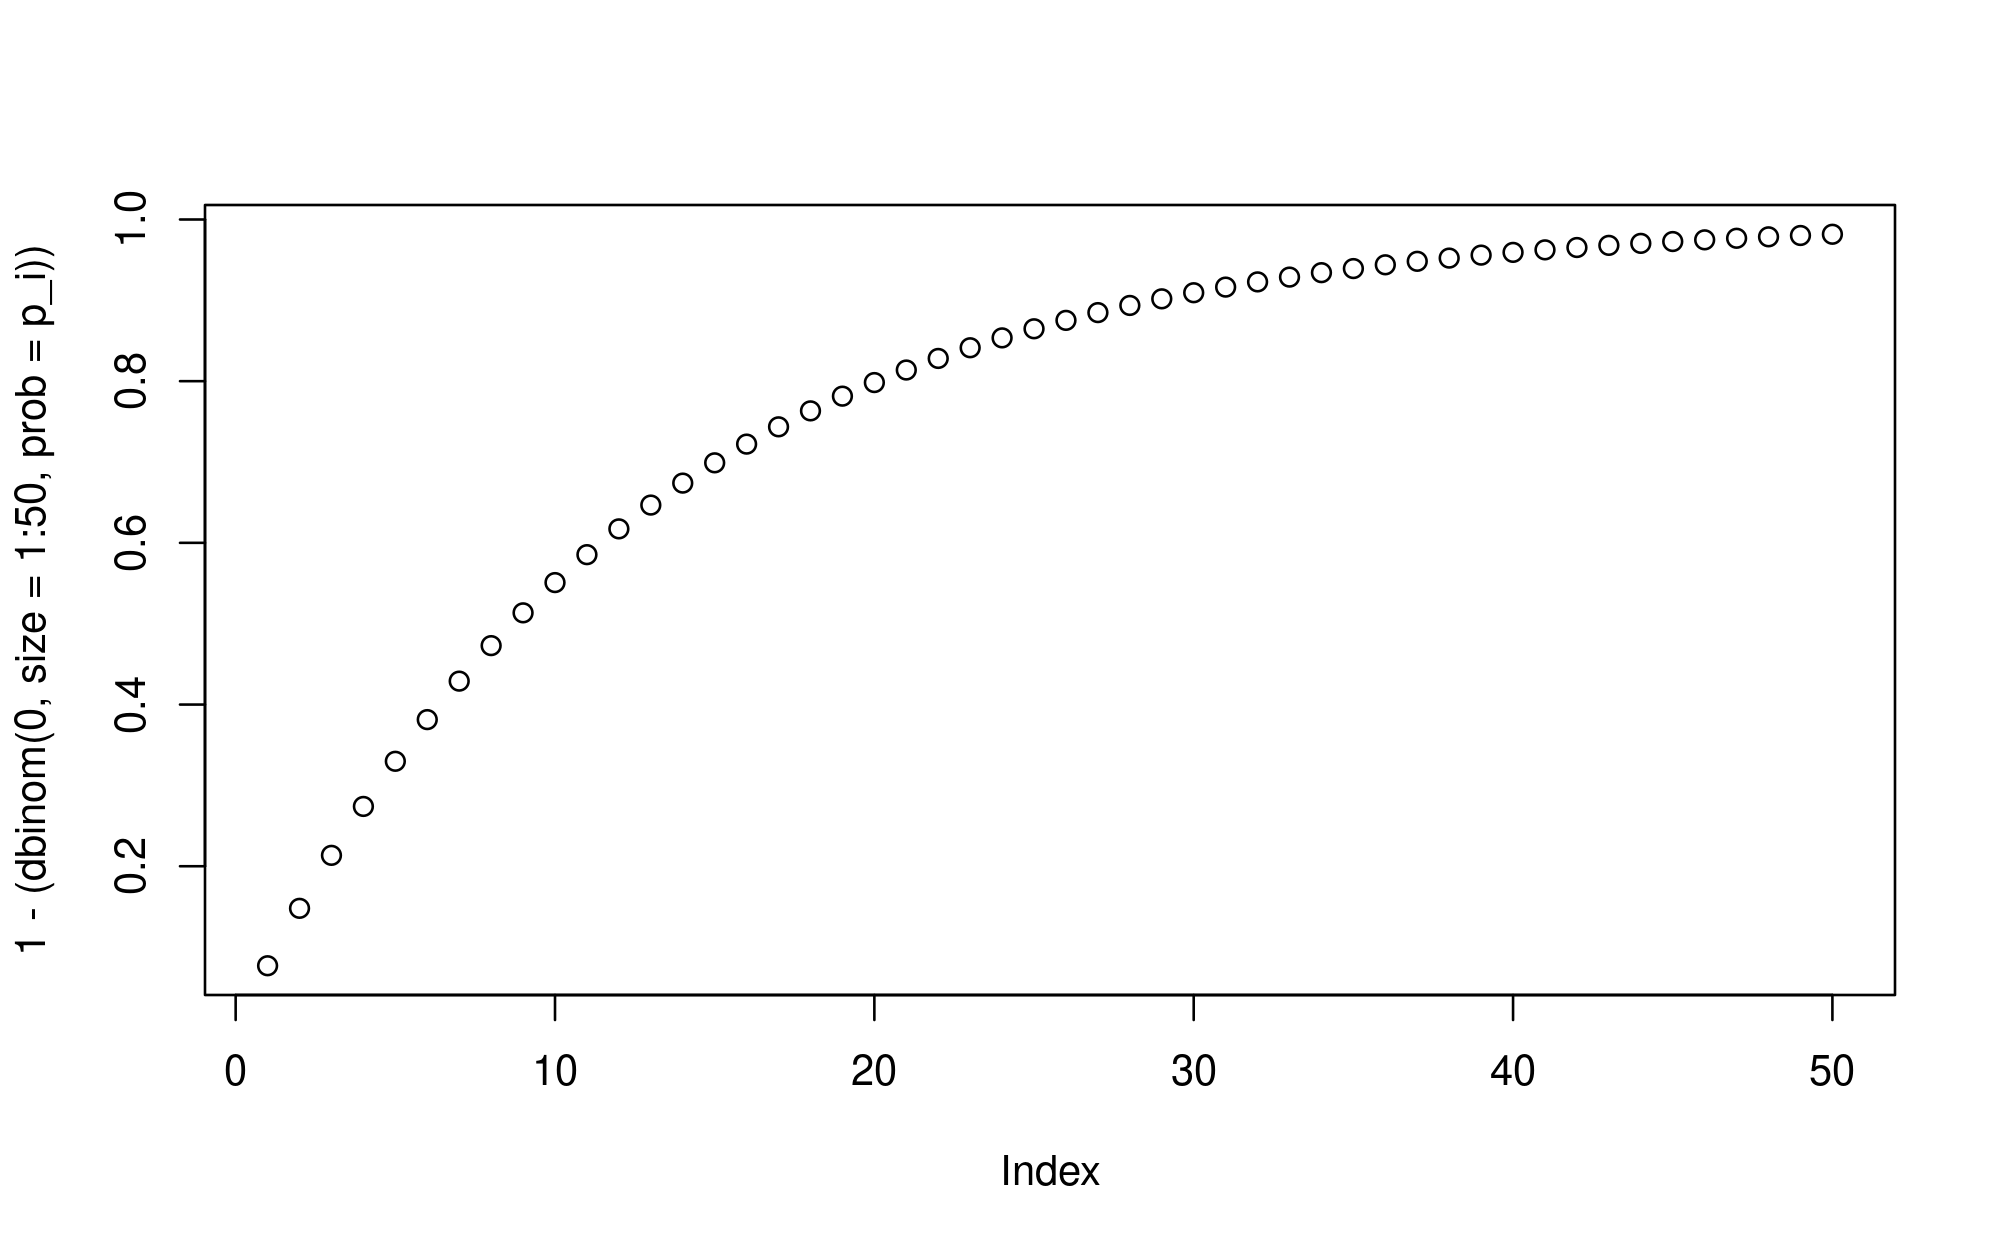

In [53]:
#we can also plot the probability of drawing an ass with respect to the number of trials
#after x trials y is the probability of drawing an ass.
plot(1-(dbinom(0 , size = 1:50, prob=p_i)))

In [57]:
p <- 1-pnbinom(8, 1, p_i) # at least 9 failures are needed
cat("The probability that at least 10 draws are needed to until one ace is drawn is", round(p, 4)*100)

The probability that at least 10 draws are needed to until one ace is drawn is 48.66

## es5

In [68]:
# defining the function

pdf_5 <- function(t, c=1){
    ifelse(t>1 & t<2 , c*(t-1)*(2-t), 0 )
} 


In [71]:
# the integral of f must be equal to 1, so we have to find c which normalize f
c <- 1 / integrate(f, -Inf, Inf)$value
cat("the value of c that normalize the pdf is", c,"\n")
cat("Analitically the found value of c in c=6")


the value of c that normalize the pdf is 6 
Analitically the found value of c in c=6

In [143]:
options(repr.plot.width = 5, repr.plot.height = 5, repr.plot.res = 250)

#redefinde pdf with the correct value of c=6
pdf_es5 <- function(t, c=6){
    ifelse(t>1 & t<2 , c*(t-1)*(2-t), 0 )
} 
#the cumulative function is found by hand, founding the primitive function of the pdf
cdf_es5 <- function(t, c=6){ 
    ifelse(t < 2 & t > 1, -c*(1/3*t^3 - 3/2 * t^2 + 2*t) + 5, ifelse(t>=2, 1, 0))
}

#quantile function <- inverse function of cdf => takes input a quantile and returns probability
#cdf is a polinomial function => 
#quantile must exstract the roots of the "scaled" cdf_function to find the prob value correspondind to this quantile

q_func <- function(q){
    ifelse(q>=0 & q<=1, uniroot(
        function(x){cdf_es5(x) - q},
        lower=1,upper=2)$root, "error" )
}

#random
r_func <- function(n){
    quant <- runif(n)
    v <- vector()
    for (q in quant){
        v <- append(v, q_func(q))
    }
    return(v)
}

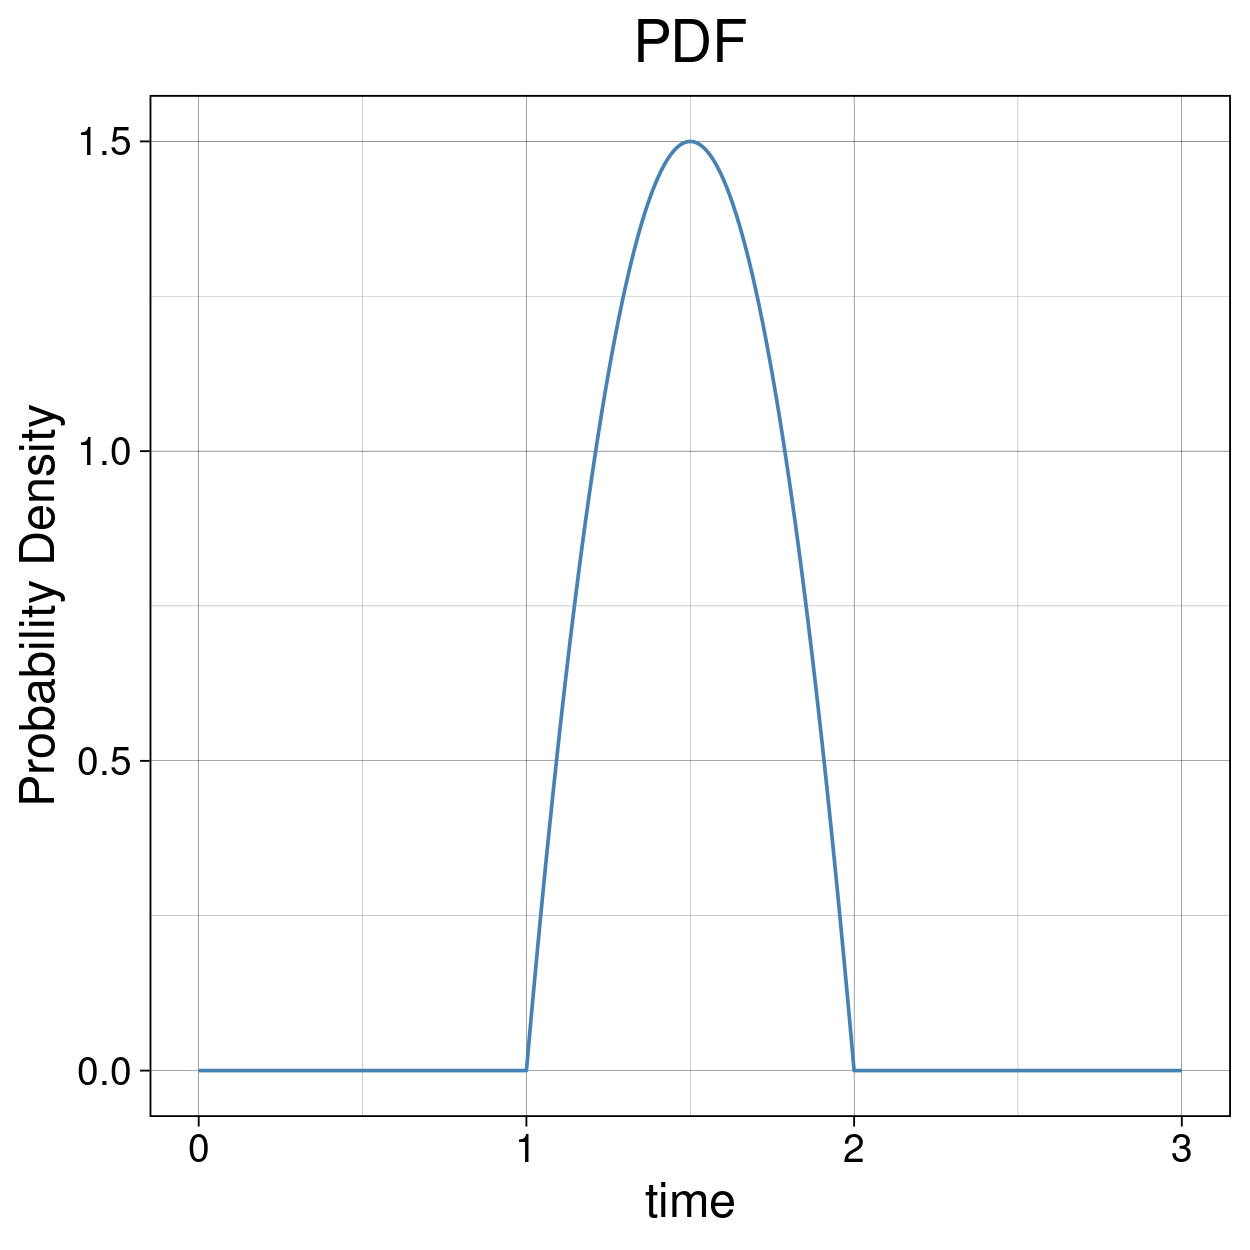

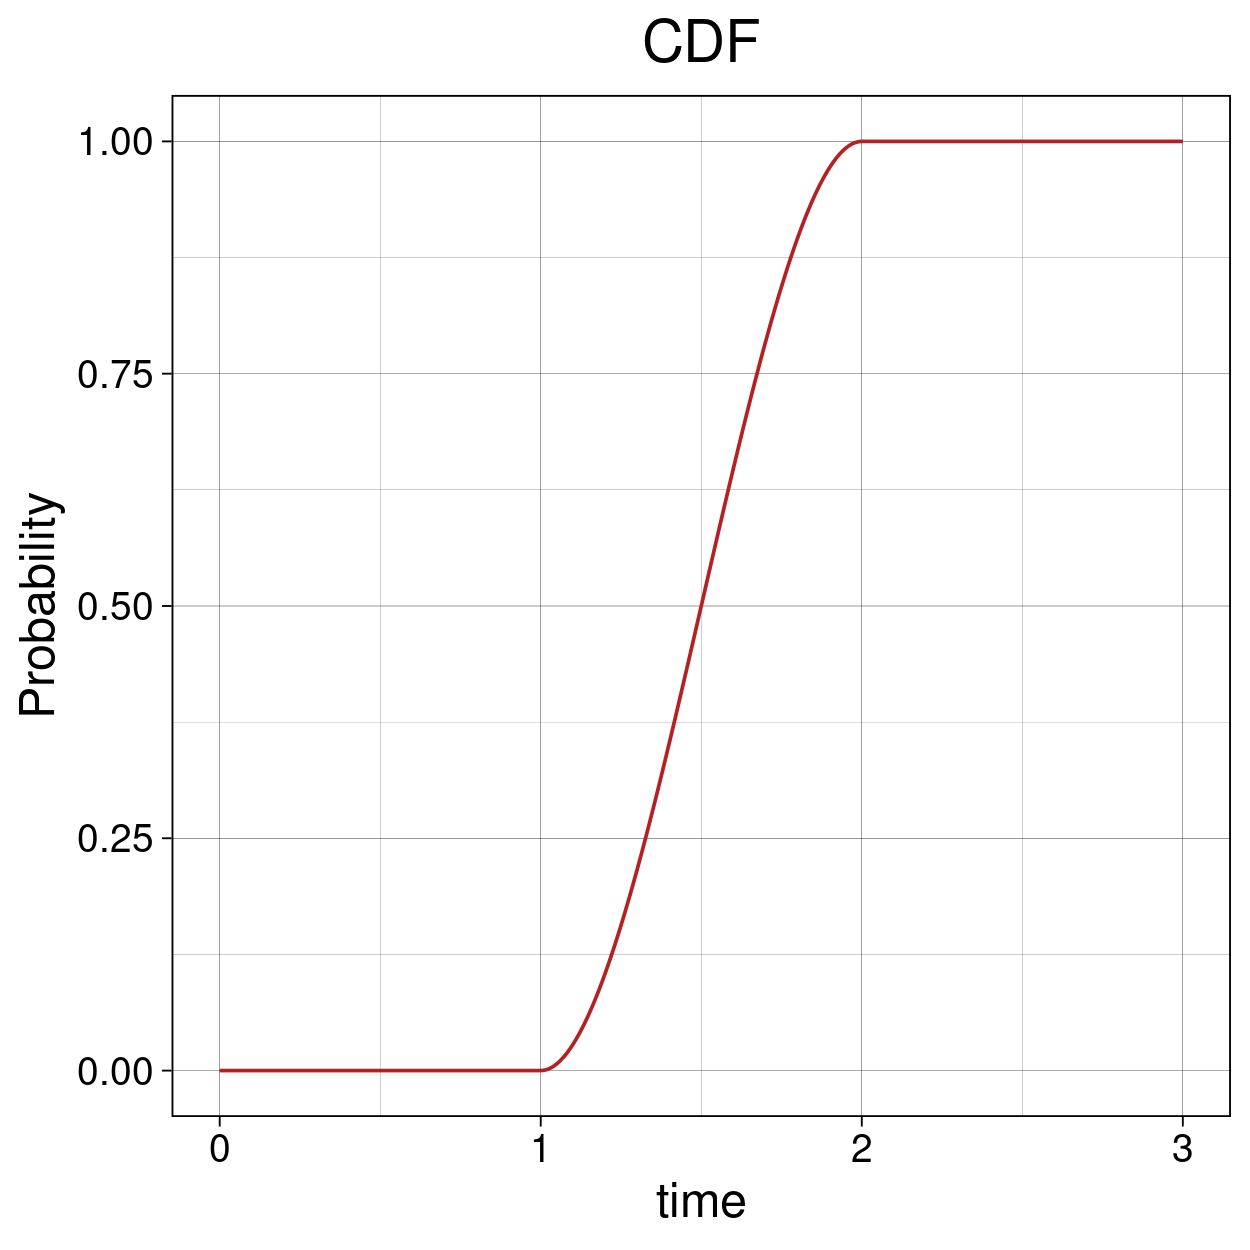

In [115]:
#plot pdf and cdf
t <- seq(0,3,0.01)

ggplot()+
    geom_line(aes(x=t, y=pdf_es5(t)), color="steelblue") + 
    theme_linedraw() +
    labs(title="PDF", x="time", y="Probability Density")+
    theme(text = element_text(size=14), plot.title = element_text( hjust = 0.5))

ggplot()+
    geom_line(aes(x=t, y=cdf_es5(t)), color="firebrick") + 
    theme_linedraw() +
    labs(title="CDF", x="time", y="Probability")+
    theme(text = element_text(size=14), plot.title = element_text( hjust = 0.5))


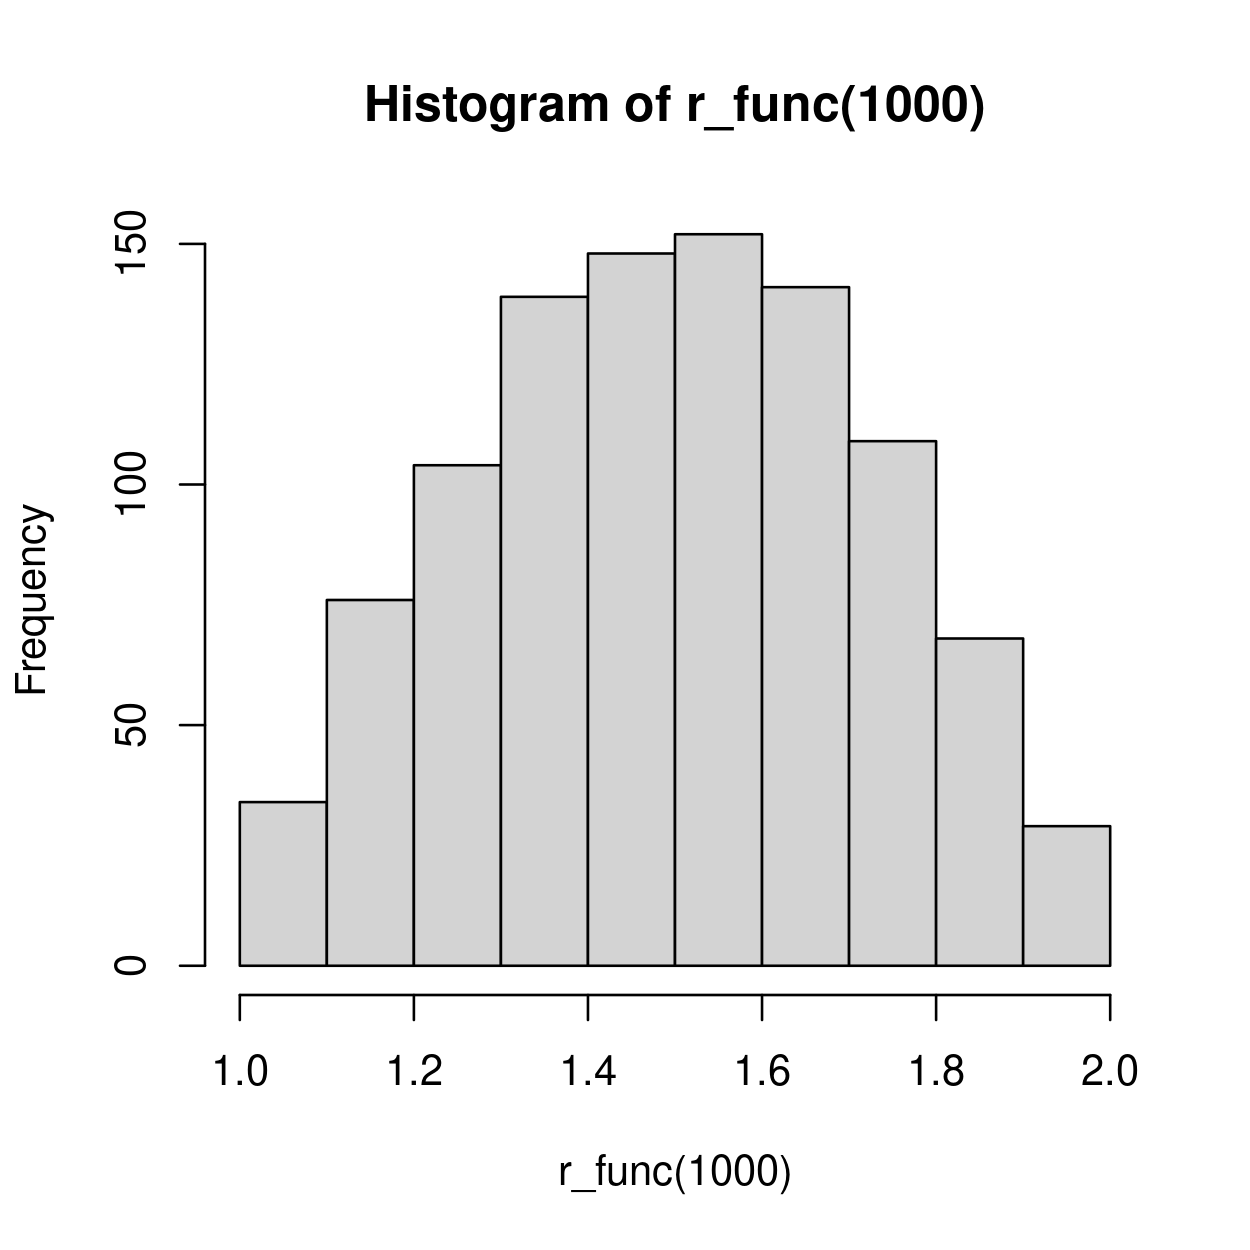

In [144]:
#testing r function
hist(r_func(1000))

In [ ]:
#probability of finishing in more than 75 min
cat("The probability of finihing in more than 75 mins is",integrate(Vectorize(f), lower=1.25, upper=2)$value,"\n")
cat("The probability of finihing in exactly 90 mins is",0,"\n")
cat("The probability of finihing in exactly 120 mins is",0)


The probability of finihing in more than 75 mins is 0.84375 
The probability of finihing in exactly 90 mins is 0 
The probability of finihing in exactly 120 mins is 0

## es6

In [163]:
#pdf
pdf_es6 <- function(x) {
    ifelse(
        x>1 & x<2,
        2/x^2,
        0
    )
}
#cdf
cdf_es6 <- function(x) {
    ifelse(x>1 & x<2, - 2/x + 2, ifelse(x>=2, 1, 0))
} 

#quantile function
q_func <- function(q){
    ifelse(q>=0 & q<=1, uniroot(
        function(x){cdf_es6(x) - q},
        lower=1,upper=2)$root, "error" )
}

#random function
r_func <- function(n){
    quant <- runif(n)
    v <- vector()
    for (q in quant){
        v <- append(v, q_func(q))
    }
    return(v)
}

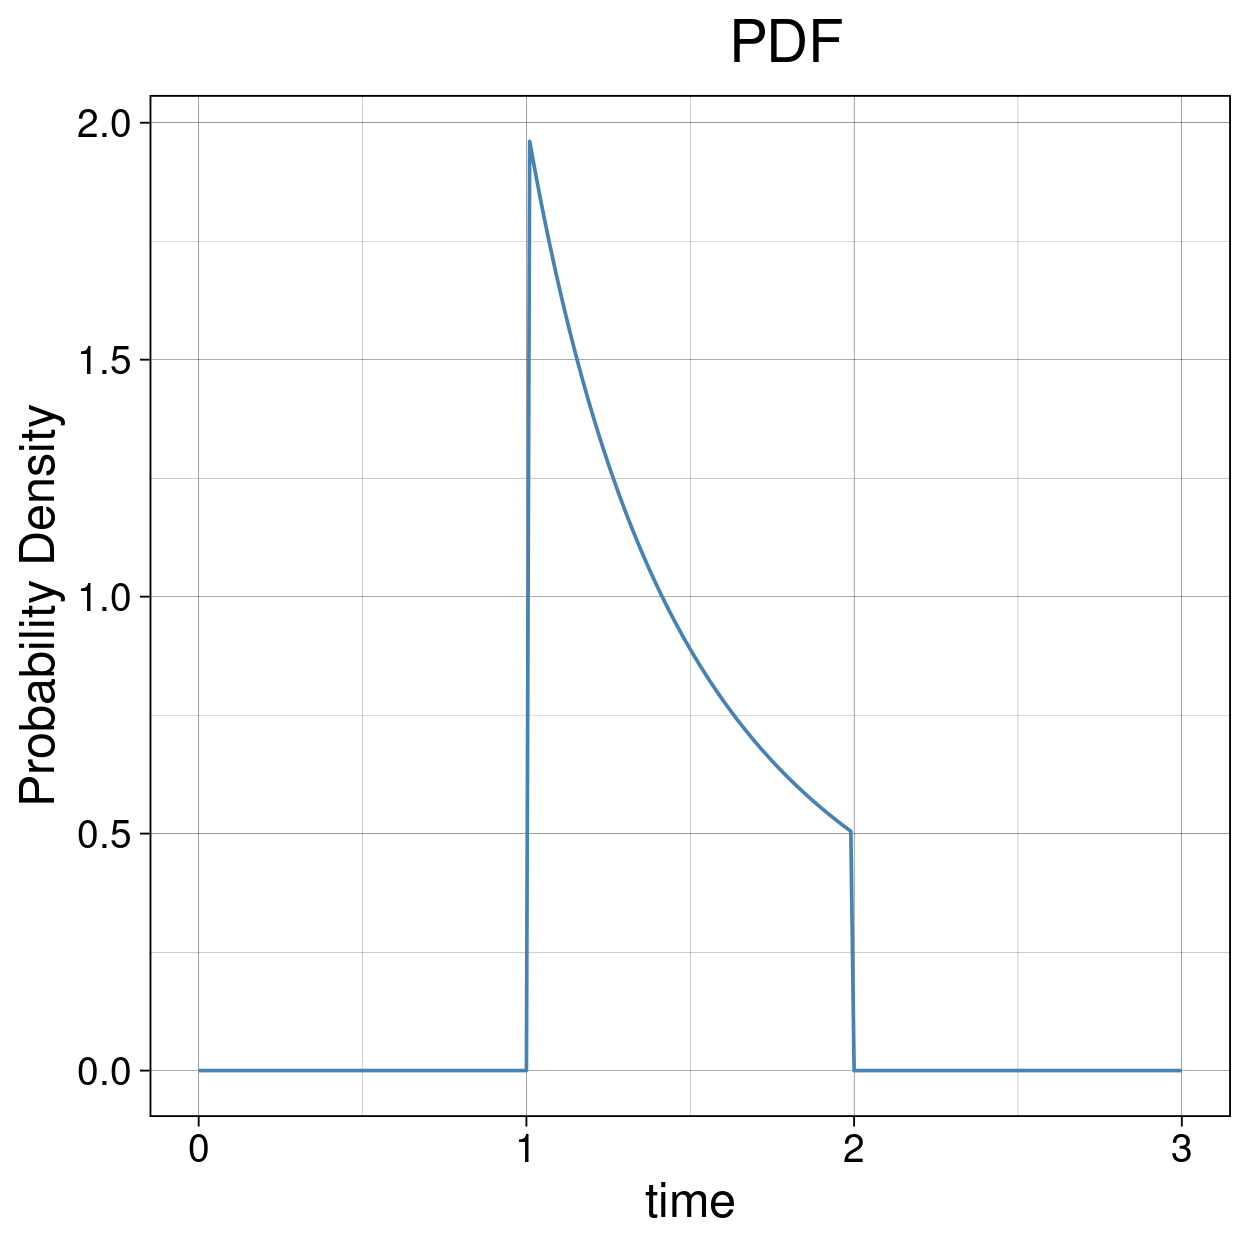

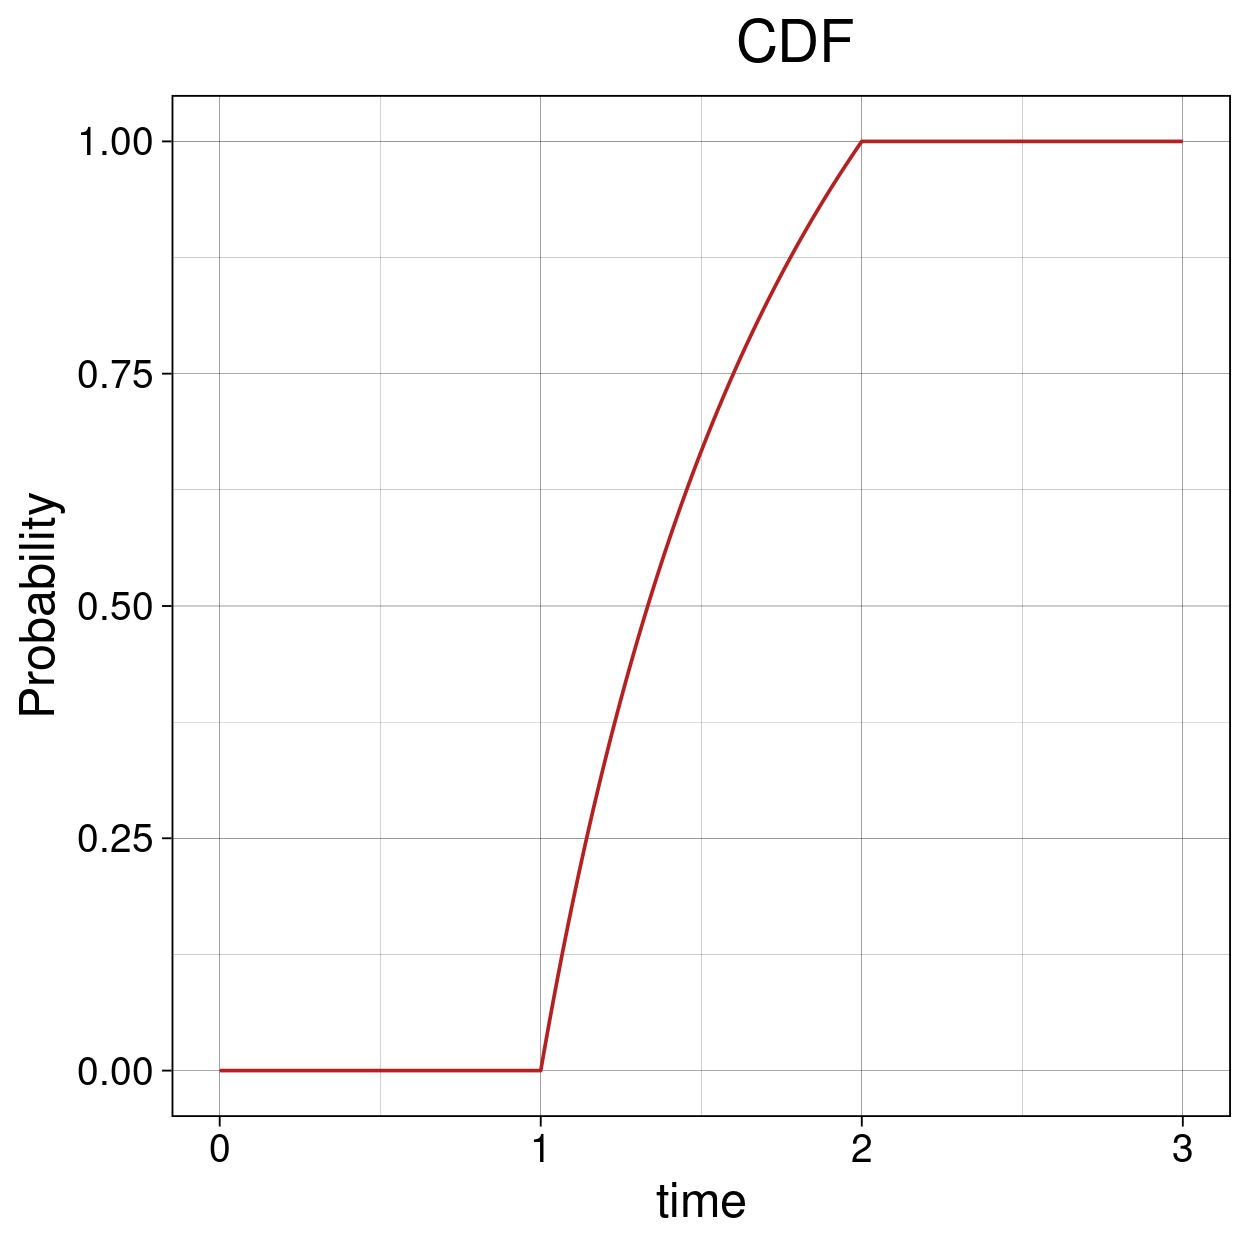

In [157]:
#plot pdf and cdf
t <- seq(0,3,0.01)

ggplot()+
    geom_line(aes(x=t, y=pdf_es6(t)), color="steelblue") + 
    theme_linedraw() +
    labs(title="PDF", x="time", y="Probability Density")+
    theme(text = element_text(size=14), plot.title = element_text( hjust = 0.6))

ggplot()+
    geom_line(aes(x=t, y=cdf_es6(t)), color="firebrick") + 
    theme_linedraw() +
    labs(title="CDF", x="time", y="Probability")+
    theme(text = element_text(size=14), plot.title = element_text( hjust = 0.6))


In [179]:
#probability x less than 1.5 => integrate from 1 to 1.5
Prob <- integrate(pdf_es6,1, 1.5)$value
cat("The probability that tires will last less than 1.5*10^4 km is", round(Prob*100, 3),"%" )

The probability that tires will last less than 1.5*10^4 km is 66.667 %

In [168]:
N <- 3000
samples <- r_func(N)
mu <- mean(samples)
E <- sum(samples) / N
var <- sum(samples^2)/N - E^2

cat("The mean value is",round(E,4),"\n")
cat("The variance is",round(var,4))

The mean value is 1.3907 
The variance is 0.0795

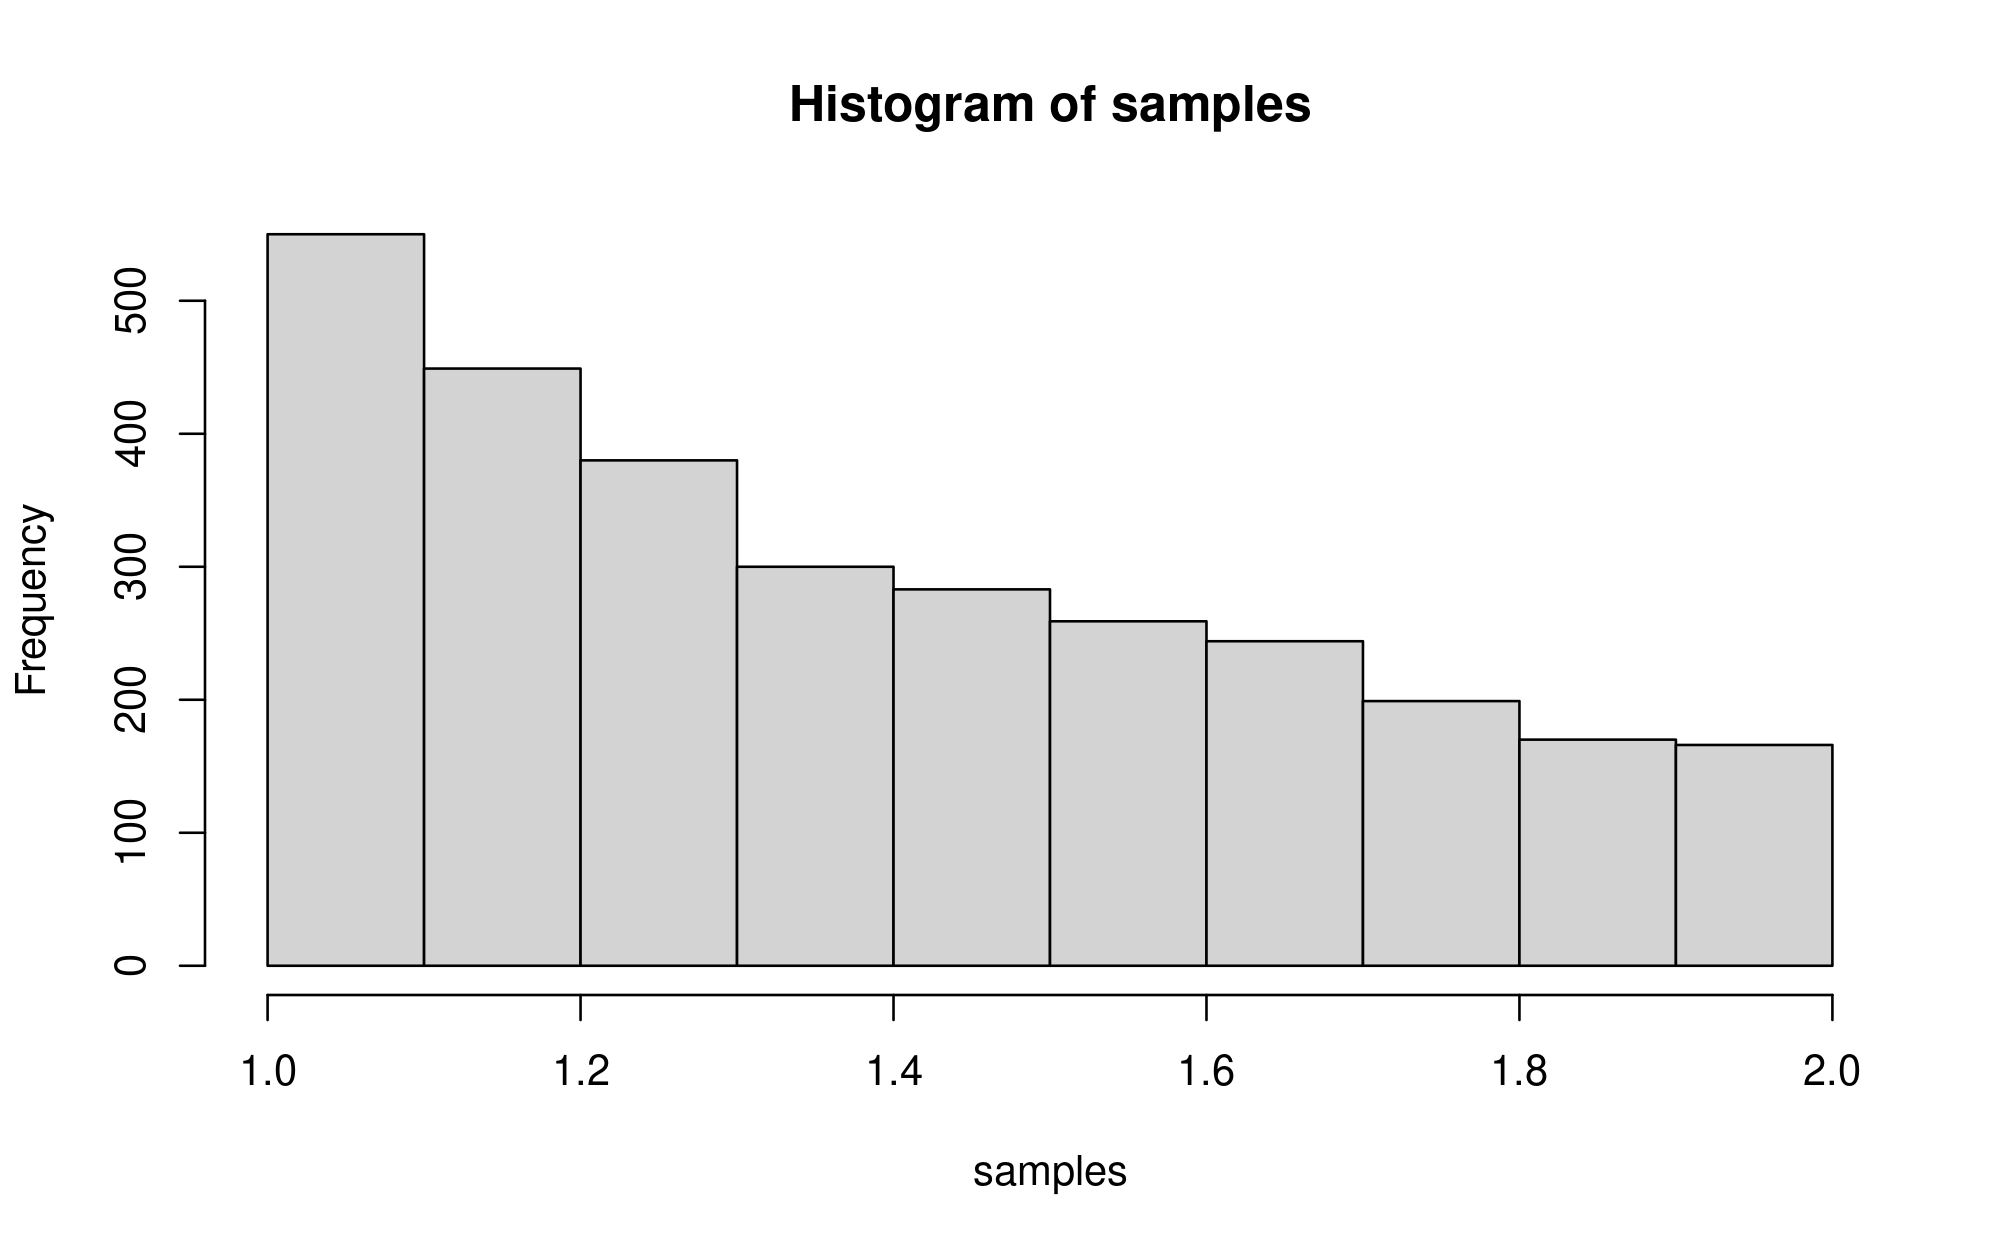

In [183]:
hist(samples)